In [66]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
exp_id = '54_13'

In [68]:
# Standard MLP Metric
mlp_path = f'../experiments/ebe_vs/standard_models/standard_MLP'

with open(f"{mlp_path}/{exp_id}_MLP.json",) as json_file:
        mlp_json = json.load(json_file)
mlp_metric = mlp_json['test_acc']
mlp_json

{'seed': 13,
 'data_id': 54,
 'time_taken': 0.8251872062683105,
 'train_acc': 0.9981481481481481,
 'val_acc': 0.8382352941176471,
 'test_acc': 0.8117647058823529,
 'train_loss': 0.03702388646759606}

In [69]:
# Standard ML Models
ml_path = f'../experiments/ebe_vs/standard_models'
with open(f"{ml_path}/{exp_id}_ML.json",) as json_file:
        ml_json = json.load(json_file)
ml_metric = ml_json['best_accuracy']
ml_json

{'best_model': 'QDA',
 'best_accuracy': 0.8411764705882353,
 'total_training_time_sec': 0.8716542720794678,
 'all_results': {'LogisticRegression': {'test_acc': 0.788235294117647,
   'training_time_sec': 0.02150559425354004},
  'SVC': {'test_acc': 0.7647058823529411,
   'training_time_sec': 0.009000062942504883},
  'DecisionTree': {'test_acc': 0.6941176470588235,
   'training_time_sec': 0.003998279571533203},
  'RandomForest': {'test_acc': 0.7176470588235294,
   'training_time_sec': 0.10700774192810059},
  'GradientBoosting': {'test_acc': 0.788235294117647,
   'training_time_sec': 0.534111738204956},
  'AdaBoost': {'test_acc': 0.5647058823529412,
   'training_time_sec': 0.05450868606567383},
  'KNN': {'test_acc': 0.7235294117647059, 'training_time_sec': 0.0},
  'NaiveBayes': {'test_acc': 0.48823529411764705,
   'training_time_sec': 0.0009980201721191406},
  'QDA': {'test_acc': 0.8411764705882353,
   'training_time_sec': 0.002000093460083008},
  'LDA': {'test_acc': 0.7529411764705882,
  

In [70]:
# NaiveAutoML Models
naml_path = f'../experiments/ebe_vs/naml_baseline-models'
with open(f"{naml_path}/{exp_id}_NAML.json",) as json_file:
        naml_json = json.load(json_file)
naml_metric = naml_json['test_accuracy_best_non_nn_model']
naml_json

{'seed': 13,
 'data_id': 54,
 'time_taken': 20.47212839126587,
 'max_training_metric': 0.8397,
 'test_accuracy_best_non_nn_model': 0.8411764705882353}

In [71]:
# oracle models
oracle_path = f'../experiments/ebe_vs/oracle'
with open(f"{oracle_path}/{exp_id}_Oracle-summary.json",) as json_file:
        oracle_json = json.load(json_file)

oracle_metric = oracle_json['max_test_acc']
oracle_json

{'seed': 13,
 'data_id': 54,
 'total_time': 8037.272700548172,
 'max_train_acc': 0.9981481481481481,
 'min_train_loss': 0.004807571825329904,
 'max_val_acc': 0.8602941176470589,
 'min_val_loss': 0.3563264564556234,
 'max_test_acc': 0.8235294117647058,
 'min_test_loss': 0.39198508858680725}

In [72]:
# EBE models
ebe_path = f'../experiments/ebe_vs/ebe-models'
with open(f"{ebe_path}/{exp_id}_ES_EBE-summary.json",) as json_file:
        ebe_json = json.load(json_file)

print(ebe_json)
ebe_metric = ebe_json['max_test_acc']
ebe_df = pd.read_csv(f'{ebe_path}/{exp_id}_ES_EBE.csv')
display(ebe_df.head())


{'seed': 13, 'data_id': 54, 'training_time': 84.31441521644592, 'max_train_acc': 0.9851851851851852, 'min_train_loss': 0.05155790122570815, 'max_val_acc': 0.8455882352941176, 'min_val_loss': 0.40275031328201294, 'max_test_acc': 0.8176470588235294, 'min_test_loss': 0.3887413442134857}


,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_train_losses,es_val_losses,es_train_accs,es_val_accs,es_test_loss,es_test_acc
0,87,512,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",30,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[200, 315]",triangular,2,<class 'torch.nn.modules.activation.ReLU'>,0.0,...,0.081316,0.477750,0.985185,0.816176,"[1.4906175525100143, 1.2153203301959568, 1.087...","[1.2920315265655518, 1.2095131874084473, 1.133...","[0.2518518518518518, 0.4740740740740741, 0.596...","[0.4338235294117647, 0.5073529411764706, 0.485...",0.464509,0.817647
1,128,64,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",27,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[27, 465, 444, 287, 49]",mutated,25,<class 'torch.nn.modules.activation.Tanh'>,0.1,...,0.071537,0.635614,0.974074,0.816176,"[1.1690722562648632, 0.8438994509202463, 0.726...","[0.9814878106117249, 0.7616929166457233, 0.714...","[0.4222222222222222, 0.6444444444444445, 0.692...","[0.5514705882352942, 0.6176470588235294, 0.654...",0.765408,0.752941
2,42,128,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",30,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[205, 206]",inv_pyramid,2,<class 'torch.nn.modules.activation.ReLU'>,0.5,...,0.280538,0.573566,0.862963,0.808824,"[1.2540652398709897, 0.9668744643529256, 0.817...","[1.0330525356180527, 0.8755577837719637, 0.756...","[0.3907407407407407, 0.5925925925925926, 0.659...","[0.5514705882352942, 0.5955882352941176, 0.639...",0.496544,0.741176
3,52,256,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",30,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[321, 243, 385]",irregular,3,<class 'torch.nn.modules.activation.ELU'>,0.4,...,0.313338,0.453662,0.844444,0.816176,"[1.8211502287122938, 1.3576185994678074, 1.087...","[1.1542936563491821, 0.995035707950592, 0.8255...","[0.2962962962962963, 0.45925925925925926, 0.55...","[0.47058823529411764, 0.5367647058823529, 0.57...",0.486197,0.764706
4,998,32,"[54, 108, 216, 432, 864]",4,"[0.1, 0.4, 1.2000000000000002, 3.2]","[487, 375, 373, 367, 396]",mutated,37,<class 'torch.nn.modules.activation.ELU'>,0.0,...,0.071271,0.971531,0.970370,0.816176,"[4.241509659202011, 0.7256132585031015, 0.5915...","[0.8685108703725478, 0.7475575243725496, 0.738...","[0.45, 0.6481481481481481, 0.7018518518518518,...","[0.5955882352941176, 0.625, 0.6176470588235294...",0.691591,0.770588


In [73]:
oracle_df = pd.read_csv(f'{oracle_path}/{exp_id}_Oracle_all.csv')
oracle_df['id'].min()
# oracle_df.head()

np.int64(0)

# Plot them

In [74]:
import ast
import numpy as np
ebe_df['es_train_losses'] = ebe_df['es_train_losses'].apply(ast.literal_eval)
ebe_df['es_val_losses'] = ebe_df['es_val_losses'].apply(ast.literal_eval)
ebe_df['es_train_accs'] = ebe_df['es_train_accs'].apply(ast.literal_eval)
ebe_df['es_val_accs'] = ebe_df['es_val_accs'].apply(ast.literal_eval)

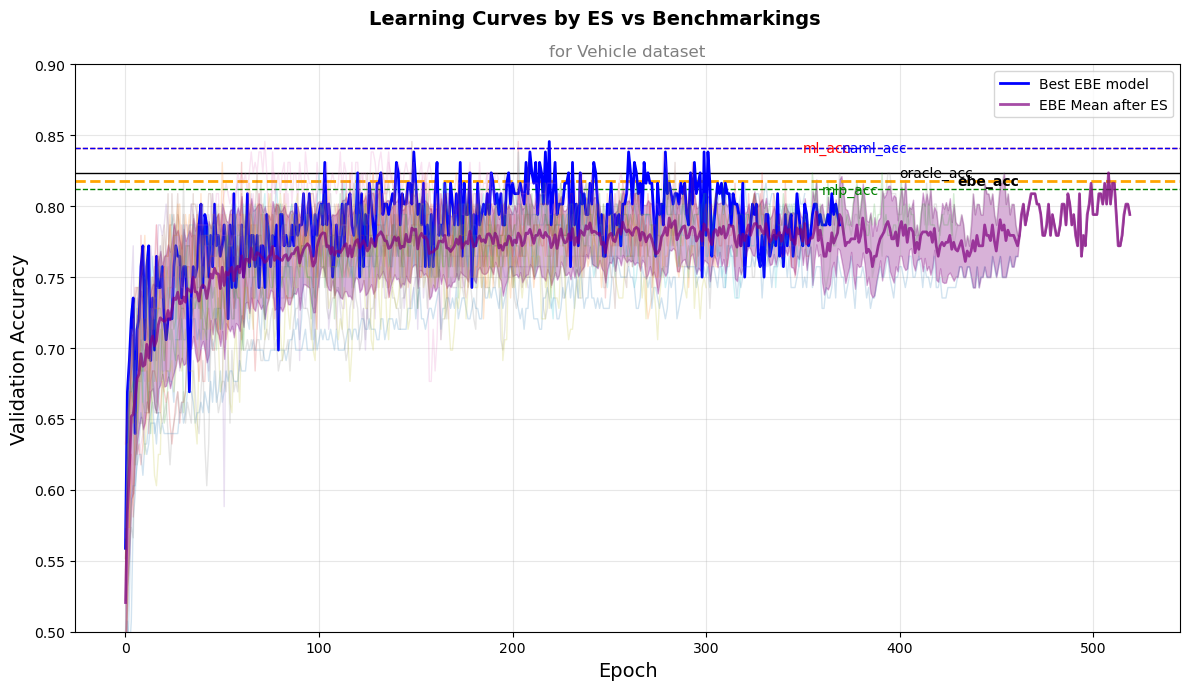

In [75]:
fig, ax = plt.subplots(figsize=(12, 7))

xmax = 400
# Horizontal reference lines + text
ax.axhline(y=ml_metric, color='r', linestyle='--', linewidth=1)
ax.text(xmax - 50, ml_metric, "ml_acc", color='r', va='center', ha='left')

ax.axhline(y=mlp_metric, color='g', linestyle='--', linewidth=1)
ax.text(xmax - 40, mlp_metric, "mlp_acc", color='g', va='center', ha='left')

ax.axhline(y=naml_metric, color='b', linestyle='--', linewidth=1)
ax.text(xmax - 30, naml_metric, "naml_acc", color='b', va='center', ha='left')

ax.axhline(y=oracle_metric, color='black', linestyle='-', linewidth=1)
ax.text(xmax, oracle_metric, "oracle_acc", color='black', va='center', ha='left')

ax.axhline(y=ebe_metric, color='orange', linestyle='--', linewidth=2)
ax.text(xmax+30, ebe_metric, "ebe_acc", color='black', va='center', ha='left', fontweight='bold')

# Find which series has the overall maximum value
val_accs_original = np.array(ebe_df['es_val_accs'].tolist(), dtype=object)  # Keep original
max_values = []
for i in range(len(ebe_df)):
    series = ebe_df['es_val_accs'].iloc[i]  # Use iloc for safer indexing
    max_values.append(np.max(series))

best_series_idx = np.argmax(max_values)

# Plot individual learning curves
for i in range(len(ebe_df)):
    series = ebe_df['es_val_accs'].iloc[i]
    
    if i == best_series_idx:
        ax.plot(series, alpha=1.0, linewidth=2, label='Best EBE model', color='blue')
    else:
        ax.plot(series, alpha=0.2, linewidth=1)

# NaN padding approach for mean curve (using ORIGINAL data, not truncated)
max_len = max(len(x) for x in val_accs_original)

padded_val_accs = []
for acc_seq in val_accs_original:  # Use original data
    padded = np.full(max_len, np.nan)
    padded[:len(acc_seq)] = acc_seq
    padded_val_accs.append(padded)

val_accs_padded = np.array(padded_val_accs)

# Calculate mean and std, ignoring NaN values
mean_curve = np.nanmean(val_accs_padded, axis=0)
std_curve = np.nanstd(val_accs_padded, axis=0)

# Plot mean curve with error bands
epochs = range(len(mean_curve))
ax.plot(epochs, mean_curve, color='purple', label='EBE Mean after ES', linewidth=2, alpha=0.7)
ax.fill_between(epochs, mean_curve-std_curve, mean_curve+std_curve, color='purple', alpha=0.3)

# Rest of your plotting code...
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("Validation Accuracy", fontsize=14)
fig.suptitle("Learning Curves by ES vs Benchmarkings", fontsize=14, fontweight='bold')
ax.set_title("for Vehicle dataset", fontsize=12, color="gray")
ax.grid(alpha=0.3)
ax.set_ylim(0.5, 0.9)
plt.tight_layout()
plt.legend()
plt.show()

In [76]:
# Oracle
oracle_df = pd.read_csv(r'../experiments\ebe_vs\oracle\54_13_Oracle_all.csv')
oracle_df.head()

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,var_val_acc,gap_val_acc,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_time,es_lc,es_test_loss,es_test_acc
0,4,32,"[54, 108]",1,[0.1],"[472, 446, 437, 416, 411, 403, 296, 249, 160, ...",hourglass,31,<class 'torch.nn.modules.activation.ELU'>,0.2,...,NaN,NaN,0.475082,0.502412,0.725926,0.757353,43.135125,"{'es_train_losses': [5.894125965789512, 1.4669...",0.675230,0.705882
1,1,256,"[54, 108]",1,[0.1],"[260, 175, 311, 4, 199, 405, 246, 479, 300, 28...",irregular,24,<class 'torch.nn.modules.activation.LeakyReLU'>,0.1,...,NaN,NaN,1.384578,1.382597,0.270370,0.330882,3.291841,"{'es_train_losses': [4.556849747233921, 1.3857...",1.389135,0.241176
2,3,128,"[54, 108]",1,[0.1],"[37, 59, 76, 94, 96, 112, 119, 176, 217, 231, ...",inv_pyramid,31,<class 'torch.nn.modules.activation.Sigmoid'>,0.5,...,NaN,NaN,16074.264699,1.394828,0.235185,0.250000,6.162019,"{'es_train_losses': [16074.264699074074, 4026....",1.397063,0.247059
3,5,1024,"[54, 108]",1,[0.1],"[3, 19, 25, 33, 51, 99, 120, 156, 162, 211, 22...",inv_pyramid,36,<class 'torch.nn.modules.activation.ELU'>,0.1,...,NaN,NaN,1.370795,1.302735,0.274074,0.301471,3.086054,"{'es_train_losses': [1.3848339319229126, 1.384...",1.359685,0.241176
4,0,512,"[54, 108]",1,[0.1],"[498, 497, 473, 427, 404, 301, 264, 251, 247, ...",hourglass,26,<class 'torch.nn.modules.activation.LeakyReLU'>,0.4,...,NaN,NaN,590.743541,4.323606,0.227778,0.213235,2.343542,"{'es_train_losses': [590.7435406720197, 9358.6...",3.686670,0.276471


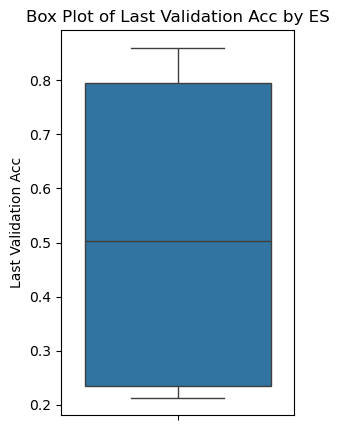

In [77]:
# Plot last val loss
plt.figure(figsize=(3, 5))
sns.boxplot(y=oracle_df['es_val_acc'])
plt.title('Box Plot of Last Validation Acc by ES')
plt.ylabel('Last Validation Acc')
plt.show()

In [78]:
ebe_df.sort_values(by='es_test_acc', ascending=False)

,id,batch_size,n_instances,epochs_trained,efforts,arch_hidden_layers,arch_shape,arch_depth,arch_activation_fn,arch_dropout_rate,...,es_train_loss,es_val_loss,es_train_acc,es_val_acc,es_train_losses,es_val_losses,es_train_accs,es_val_accs,es_test_loss,es_test_acc
0,87,512,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",30,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[200, 315]",triangular,2,<class 'torch.nn.modules.activation.ReLU'>,0.0,...,0.081316,0.477750,0.985185,0.816176,"[1.4906175525100143, 1.2153203301959568, 1.087...","[1.2920315265655518, 1.2095131874084473, 1.133...","[0.2518518518518518, 0.4740740740740741, 0.596...","[0.4338235294117647, 0.5073529411764706, 0.485...",0.464509,0.817647
6,751,64,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",10,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[489, 168, 373, 367, 314, 505, 256]",mutated,6,<class 'torch.nn.modules.activation.Tanh'>,0.0,...,0.068036,0.769459,0.974074,0.845588,"[1.1177539481057062, 0.7581105523639255, 0.600...","[0.8680273434695076, 0.6816505333956551, 0.662...","[0.48148148148148145, 0.6462962962962963, 0.73...","[0.5588235294117647, 0.6691176470588235, 0.691...",0.710447,0.800000
5,1073,32,"[54, 108, 216]",2,"[0.1, 0.4]","[389, 375, 64]",mutated,35,<class 'torch.nn.modules.activation.ReLU'>,0.2,...,0.115584,0.614366,0.966667,0.823529,"[1.2514215328075267, 0.9032702596099288, 0.670...","[1.0894510956371533, 0.8239008363555459, 0.650...","[0.42407407407407405, 0.6611111111111111, 0.69...","[0.5514705882352942, 0.6102941176470589, 0.661...",0.540026,0.794118
9,232,128,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",23,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[389, 375, 373, 367, 314, 505, 256]",mutated,4,<class 'torch.nn.modules.activation.Tanh'>,0.1,...,0.173179,0.594474,0.924074,0.808824,"[1.1821523794421442, 0.8692217473630552, 0.780...","[1.0947239048340742, 0.7927786848124336, 0.851...","[0.4351851851851852, 0.6481481481481481, 0.624...","[0.5441176470588235, 0.5735294117647058, 0.573...",0.488590,0.794118
14,1061,64,"[54, 108, 216]",2,"[0.1, 0.4]","[467, 445, 382, 367, 314, 505, 256]",mutated,15,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.108188,0.731716,0.959259,0.845588,"[1.1463261485099792, 0.6800185159400657, 0.537...","[0.7692161938723396, 0.7889676479732289, 0.647...","[0.48518518518518516, 0.6759259259259259, 0.74...","[0.6323529411764706, 0.6544117647058824, 0.661...",0.615184,0.788235
10,192,128,"[54, 108, 216, 432, 864, 1080, 1080, 1080, 108...",24,"[0.1, 0.4, 1.2000000000000002, 3.2, 5.0, 6.0, ...","[441, 367, 321, 494]",mutated,4,<class 'torch.nn.modules.activation.ELU'>,0.2,...,0.074328,1.173002,0.974074,0.838235,"[1.3884131683243646, 0.8490282703329015, 0.641...","[0.8871488991905662, 0.7830756797510035, 0.655...","[0.4722222222222222, 0.6574074074074074, 0.731...","[0.5735294117647058, 0.6323529411764706, 0.676...",0.990467,0.788235
15,1101,128,"[54, 108]",1,[0.1],"[441, 367, 450, 367, 314, 505, 256]",mutated,4,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.119372,0.873834,0.953704,0.816176,"[1.5411111716870909, 0.8635500351587931, 0.687...","[0.9955266924465404, 0.9577940842684578, 0.699...","[0.4148148148148148, 0.6611111111111111, 0.716...","[0.5661764705882353, 0.6176470588235294, 0.698...",0.732505,0.782353
8,1072,256,"[54, 108, 216]",2,"[0.1, 0.4]","[31, 243, 385]",mutated,2,<class 'torch.nn.modules.activation.ELU'>,0.4,...,0.373654,0.402750,0.825926,0.823529,"[1.3552617885448315, 1.2107159817660296, 1.131...","[1.2054572105407715, 1.1459380388259888, 1.086...","[0.32592592592592595, 0.46111111111111114, 0.4...","[0.5, 0.5147058823529411, 0.5661764705882353, ...",0.388741,0.782353
16,1063,64,"[54, 108, 216]",2,"[0.1, 0.4]","[499, 375, 373, 367, 388, 480, 128]",mutated,11,<class 'torch.nn.modules.activation.ELU'>,0.1,...,0.051558,0.819213,0.983333,0.845588,"[1.0503125098016528, 0.8045790725284152, 0.636...","[1.0472522342906279, 0.7288460065336788, 0.747...","[0.4981481481481482,